# Lab 1: Part B: Maximum a Posteriori
In this part of the lab we will find a maximum a posteriori (MAP) solution. This allows us to introduce _prior_ information we may have about the parameters. Since we're opting to use a prior, we will need to pick one! For that we will use the Normal Inverse Gamma distribution as our conjugate prior.

PLEASE limit your use of built-in functions. Use of the built-in scipy `gamma_function` function is ok, but not more specific or convenience-focused shortcut functions like `scipy.stats.norm.pdf` etc. The aim is that you implement some of these functions yourself rather than blindly using built-ins.

In [33]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 25)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from normal_inv_gamma import *
from plot_normal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Generate some data points from a normal distribution
mu = 1     # mean
sigma = 2  # standard deviation = sqrt(variance)
N = 5      # number of datapoints

X = mu + sigma*np.random.randn(N,1)

In [35]:
# hyperparameters for prior - normal inverse gamma
alpha = 1
beta = 1
gamma = 1
delta = 0

## MAP Parameter Estimation of univariate normal

### TODO 1 
On paper derive (or consult the lecture notes for) the MAP parameter estimates for the normal distribution using the normal inverse gamma prior and then insert the equations below. You can copy your answers for the ML solution from `prac1_a.ipynb`.

In [36]:
# Change the zeros to their appropriate equations.
muML = np.average(X)
sigmaML = np.sqrt(np.sum([(i - muML) ** 2 / len(X) for i in X]))
muMAP = (np.sum(X) + gamma * delta) / (len(X) + gamma)
sigmaMAP = np.sqrt((np.sum([((xi - muMAP) ** 2) for xi in X]) + 2.0 * beta + gamma * ((delta - muMAP) ** 2)) / (len(X) + 3 + 2 * alpha))

Estimated ML Mean: 1.66
Estimated ML Standard Deviation: 0.94

Estimated MAP Mean: 1.38
Estimated MAP Standard Deviation: 0.93


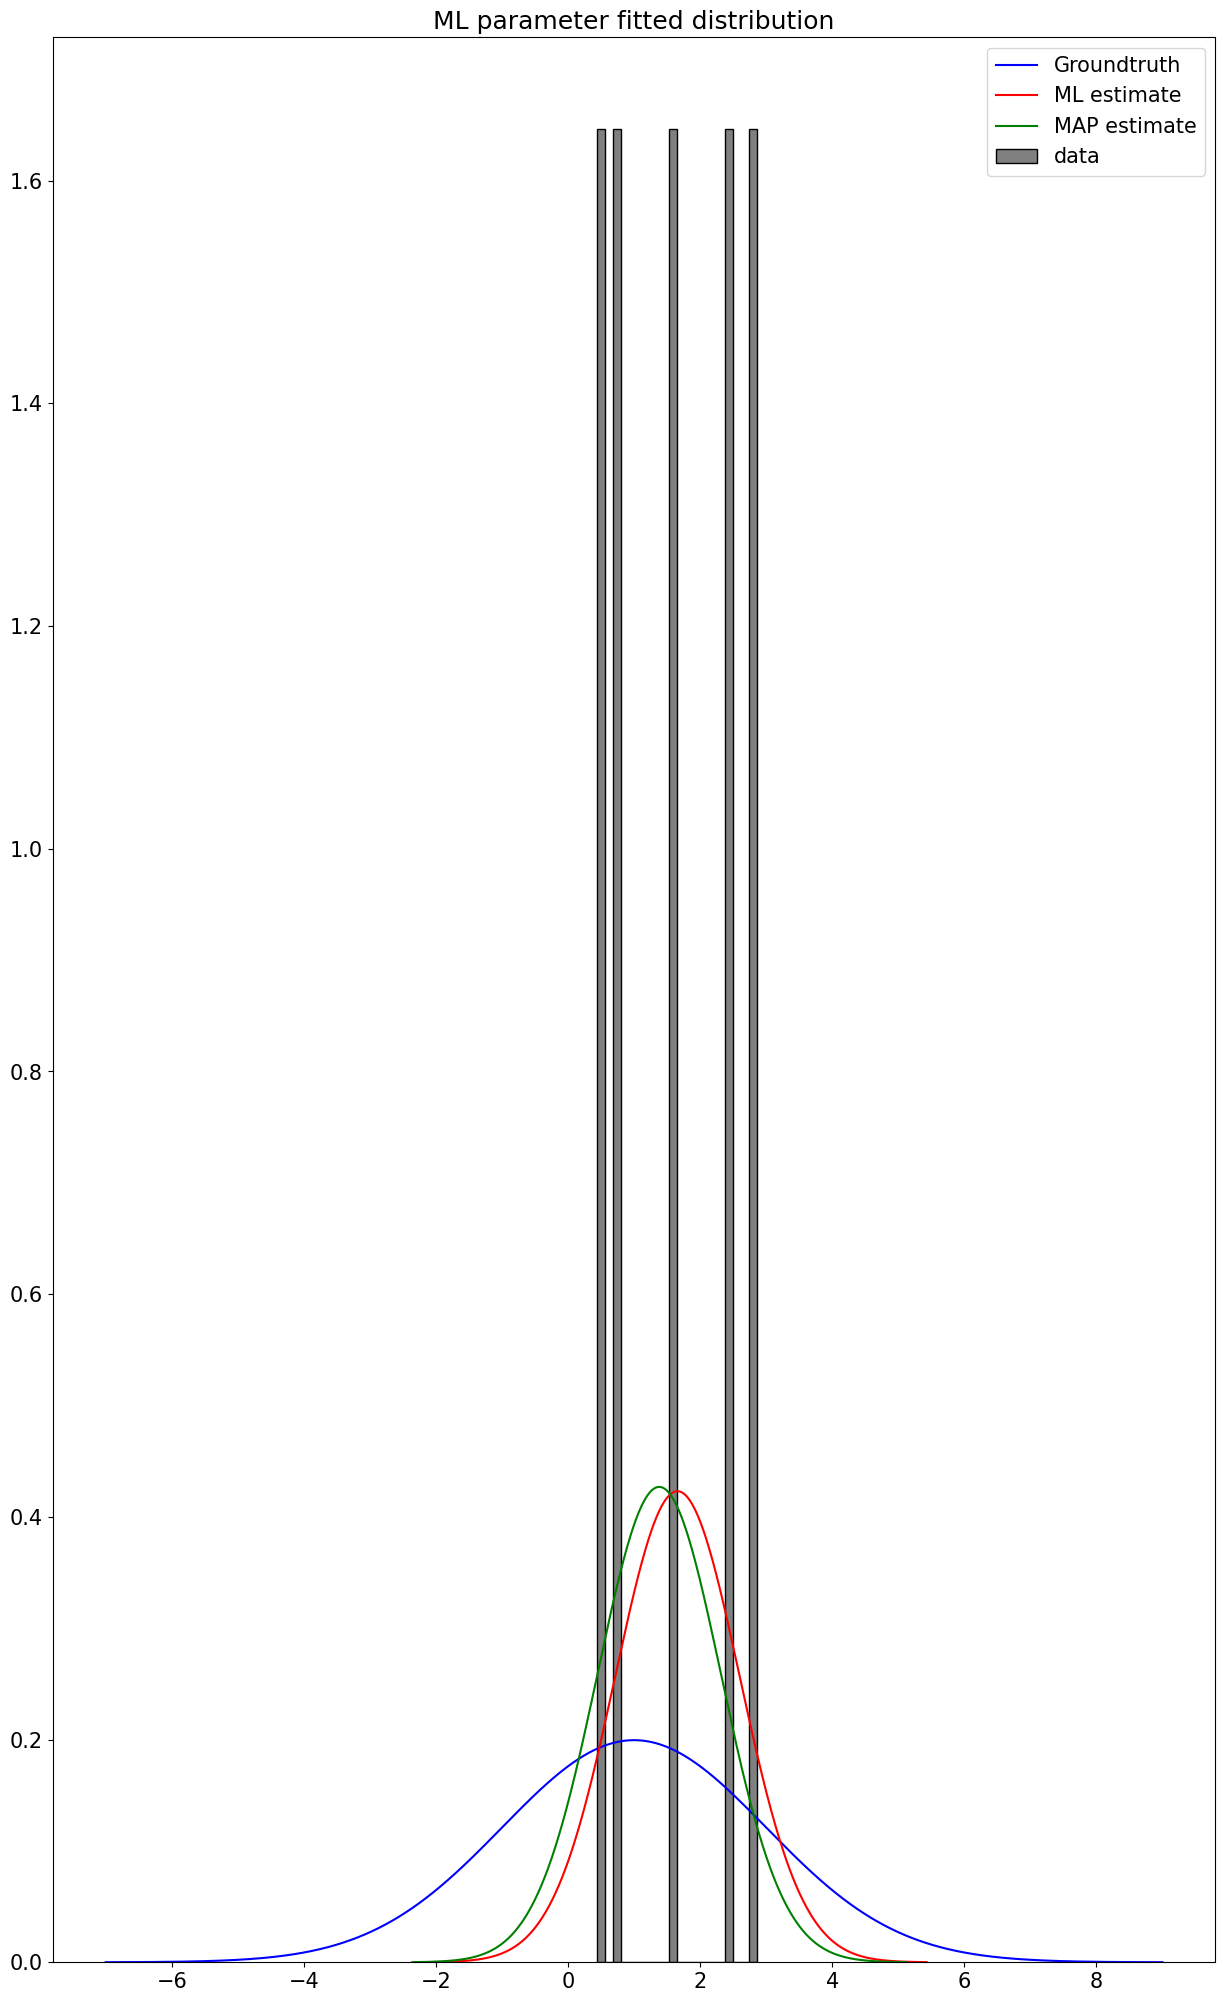

In [37]:
print("Estimated ML Mean: " + "{:.2f}".format(muML))
print("Estimated ML Standard Deviation: " + "{:.2f}".format(sigmaML))
print("")
print("Estimated MAP Mean: " + "{:.2f}".format(muMAP))
print("Estimated MAP Standard Deviation: " + "{:.2f}".format(sigmaMAP))

# Plotting univariate normal
# Normalizing histograms - assuming bins are evenly sized
[hist_count, bin_edges] = np.histogram(X, 20)
bin_width = bin_edges[1] - bin_edges[0]
hist_pos = (bin_edges[1:] + bin_edges[:-1]) / 2.

# Plot figure
plt.bar(bin_edges[:-1], hist_count/(np.sum(hist_count)*bin_width), color='gray', 
        edgecolor='k', width=bin_width, label='data')
plot_normal(mu, sigma, 'b', 'Groundtruth')
plot_normal(muML, sigmaML, 'r', 'ML estimate')
plot_normal(muMAP, sigmaMAP, 'g', 'MAP estimate')
plt.legend()
plt.title('ML parameter fitted distribution')
plt.show()

## Empirical Confirmation

Now the fun part! You've calculated the closed form solution for maximum a posteriori (MAP). We're now going to implement a brute force solution like we did in `prac1_a.ipynb` and see if we get the same answer.

### Note
Again the __TODOs__ are calling for you to dig into the functions called within the for-loops. You should have already completed the function `normal` in `prac1_a`. 


### TODO 2
Compute the probability density for the prior: See `normal_inv_gamma.py`

In [38]:
# Domain of likelihood function
sigma_range = np.linspace(0.02, 2., num=200)
mu_range = np.linspace(-2., 2., num=400)

# Brute force compute the likelihood prior functions
lfun = np.zeros((len(sigma_range), len(mu_range)))
prior = np.zeros((len(sigma_range), len(mu_range)))

for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        lfun[j,i] = normal(X, m, s)
        prior[j,i] = normal_inv_gamma(alpha, beta, delta, gamma, m, s)

### TODO 4 
Last step! Compute the posterior using Bayes rule.

In [39]:
# Change the zeros to the appropriate equation.
posterior = np.zeros(prior.shape)
for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        posterior[j, i] = lfun[j,i] * prior[j,i]

### TODO 5
Empirically verify that the maximum of the posterior is at the same position as your MAP solution.

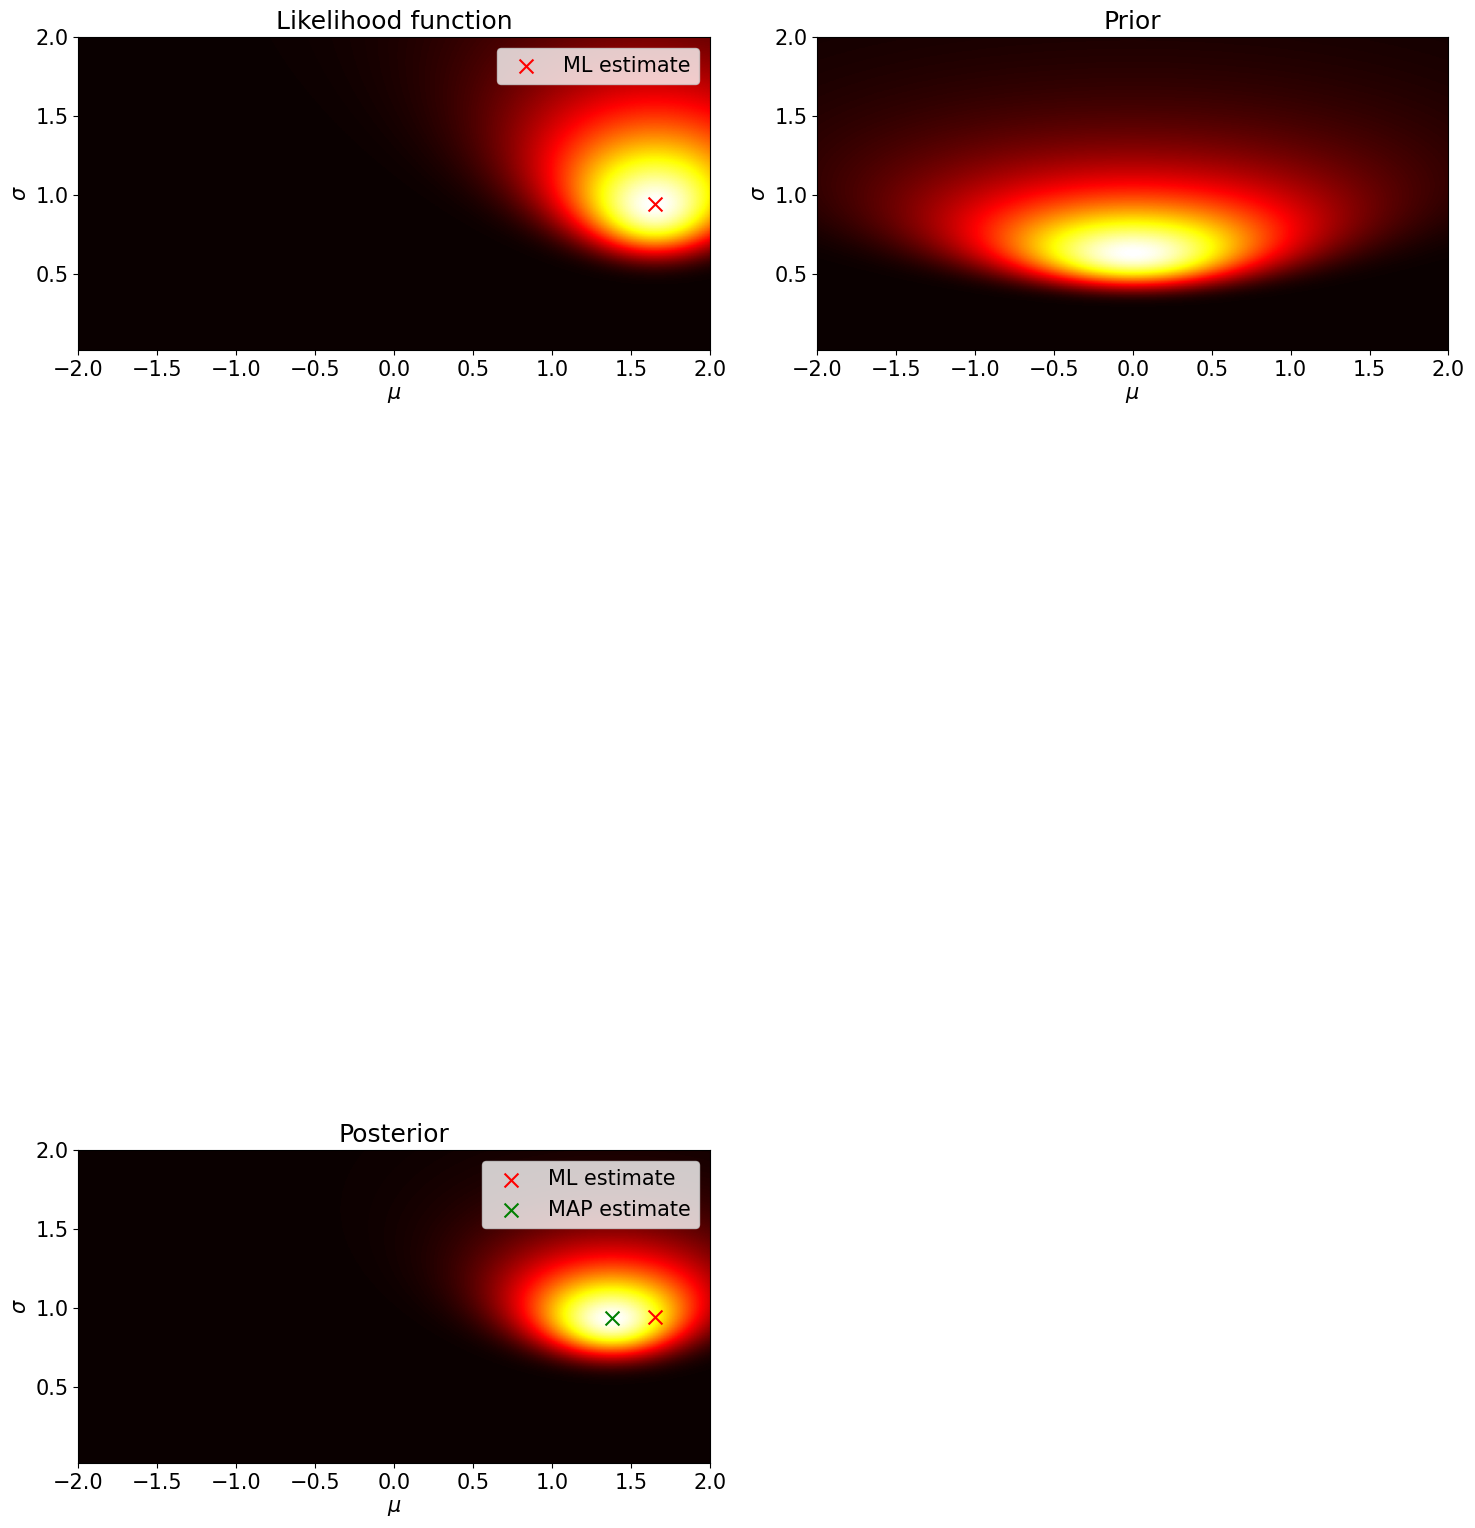

In [40]:
# Plot likelihood function
plt.subplot(2,2,1)
plt.imshow(lfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood function")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.legend()



# Plot prior
plt.subplot(2,2,2)
plt.imshow(prior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Prior")



# Plot posterior
plt.subplot(2,2,3)
plt.imshow(posterior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Posterior")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()


# Prevent subplots from bunching up
plt.tight_layout()

### TODO 6
Comment on the effects of introducing the prior as the number of datapoints is low as compared to high.
 

# My Answer
When the number of datapoints is higher, the normal() represent a distribution which is closer to actual situation. In this case, the prior's effect is less. When the dataset is small, the prior effect the result more.